# Logistic Regression Example

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [35]:
ls

02-Logistic Regression Project.ipynb*
Solving Titanic problem with Logistics.ipynb
advertising.csv*
titanic_test.csv*
titanic_train.csv*


# Importing Training Data

In [36]:
df = pd.read_csv('titanic_train.csv')

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

#### Missing Data

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

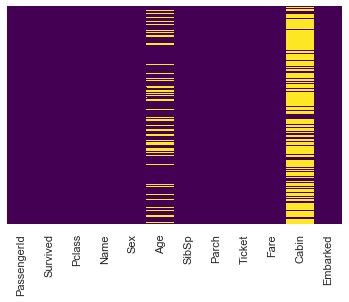

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False);

Roughly 20% of age data is missing. We need to look at a strategy to resolve the missing data problem

* Drop the missing values rows / columns - dropna
* Replace the missing values with some optimal values - Imputation (Mean/Median, Arbitrary, Rare Value)

Since Age seems to be a significant feature we will be looking at imputing the missing values

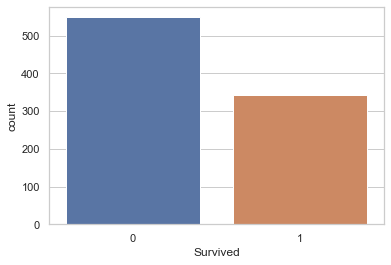

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

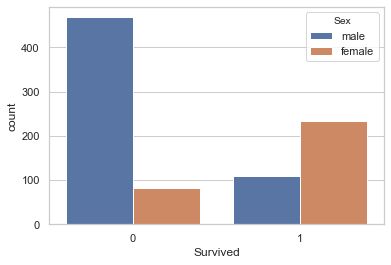

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)

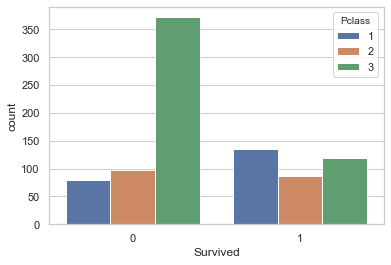

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df)

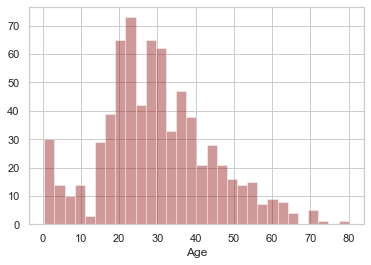

In [11]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=30)

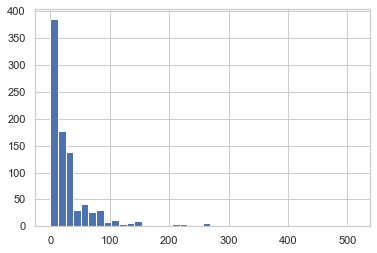

In [12]:
df['Fare'].hist(bins=40)

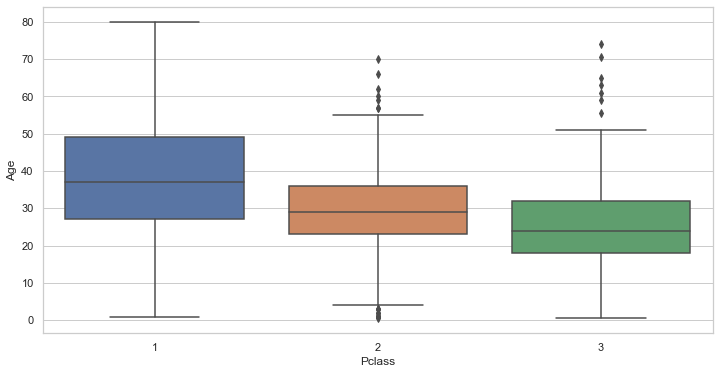

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass',y='Age',data=df)

In [14]:
def impute_age(cols):
    Age=cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

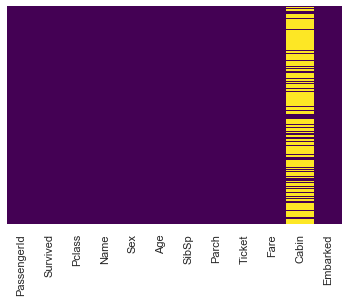

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False);

In [17]:
df.drop('Cabin',axis=1,inplace=True)

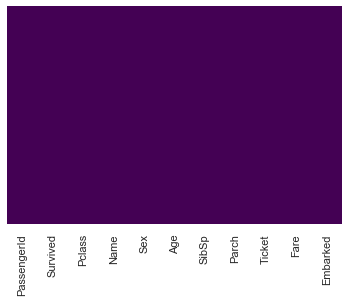

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False);

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [20]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embarked = pd.get_dummies(df['Embarked'],drop_first=True)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [22]:
df.drop(['Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [23]:
df=pd.concat([df,sex,embarked],axis=1)

# Building a logistic regression model

In [26]:
from sklearn.linear_model import LogisticRegression

In [28]:
from sklearn.model_selection import train_test_split
x=df.drop('Survived',axis=1)
y=df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [29]:
lr = LogisticRegression() 

In [30]:
lr.fit(x_train,y_train)

/Users/vipulgaur/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
predictions = lr.predict(x_test)

In [33]:
from sklearn import metrics

print('\n Confusion Matrix : \n',metrics.confusion_matrix(y_test,predictions))
print('\n Classification Report : \n',metrics.classification_report(y_test,predictions))
print('\n Accuracy Score : \n',metrics.accuracy_score(y_test,predictions))


 Confusion Matrix : 
 [[136  21]
 [ 32  79]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.71      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268


 Accuracy Score : 
 0.8022388059701493
